<a href="https://colab.research.google.com/github/Iman6243/AI/blob/main/FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.integrate import quad
from scipy.misc import derivative

# داده‌های نمونه
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 0, 1, 0, 1])
w = np.array([1, 2, 1, 2, 1, 2])  # وزن‌های نمونه
rho = 0.5  # پارامتر وزنی

# تعریف تابع s(x)
def s(x):
    return np.sin(x)

# محاسبه جمع وزن‌دار
weighted_sum = rho * np.sum(w * (y + s(x))**2)

# محاسبه مشتق دوم تابع s(x)
def s_double_prime(x):
    return derivative(s, x, dx=1e-6, n=2)

# محاسبه انتگرال
integral_result, _ = quad(lambda x: s_double_prime(x)**2, x[0], x[-1])

# ترکیب نتایج
result = weighted_sum + (1 - rho) * integral_result

# نمایش نتیجه نهایی
print("Result:", result)


Result: 6.712664838587309


<ipython-input-1-d8229afea66b>:20: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(s, x, dx=1e-6, n=2)
<ipython-input-1-d8229afea66b>:23: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_result, _ = quad(lambda x: s_double_prime(x)**2, x[0], x[-1])


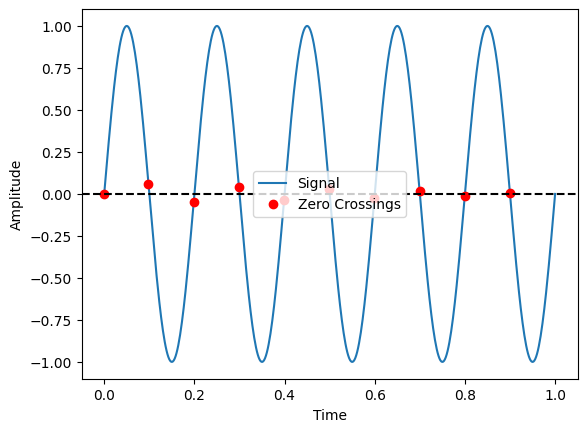

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# تولید سیگنال نمونه
t = np.linspace(0, 1, 500)
signal = np.sin(2 * np.pi * 5 * t)

# یافتن نقاط zero crossings
zero_crossings = np.where(np.diff(np.sign(signal)))[0]

# نمایش سیگنال و نقاط zero crossings
plt.plot(t, signal, label='Signal')
plt.plot(t[zero_crossings], signal[zero_crossings], 'ro', label='Zero Crossings')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# بارگذاری داده‌ها
data = load_iris()
X = data.data
y = data.target

# تقسیم داده‌ها به مجموعه آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ایجاد مدل پایه (در اینجا رگرسیون لجستیک)
model = LogisticRegression(max_iter=200)

# اعمال روش Forward Selection
selector = RFE(model, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)

# نمایش ویژگی‌های انتخاب شده
print("Selected features:", selector.support_)
print("Ranking of features:", selector.ranking_)

# آموزش مدل با ویژگی‌های انتخاب شده
model.fit(X_train[:, selector.support_], y_train)

# ارزیابی مدل
accuracy = model.score(X_test[:, selector.support_], y_test)
print("Model accuracy with selected features:", accuracy)


Selected features: [False  True  True  True]
Ranking of features: [2 1 1 1]
Model accuracy with selected features: 1.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ایجاد مجموعه داده نمونه
data = {'Age': [22, 25, 47, 52, 46, 56, 55, 60, 62, 61],
        'Salary': [50000, 54000, 95000, 113000, 98000, 125000, 130000, 150000, 155000, 160000],
        'Purchased': [0, 0, 1, 1, 1, 1, 0, 1, 1, 1]}  # Purchased به عنوان متغیر وابسته باینری

df = pd.DataFrame(data)

# تفکیک متغیرهای مستقل و وابسته
X = df[['Age', 'Salary']]
y = df['Purchased']

# تقسیم داده‌ها به مجموعه‌های آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ایجاد مدل رگرسیون لجستیک
model = LogisticRegression()
model.fit(X_train, y_train)

# پیش‌بینی با استفاده از مدل
y_pred = model.predict(X_test)

# ارزیابی مدل
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# نمایش نتایج
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



        PC1           PC2
0 -2.449490  3.439900e-16
1 -1.224745 -1.146633e-16
2  0.000000 -0.000000e+00
3  1.224745  1.146633e-16
4  2.449490  2.293267e-16


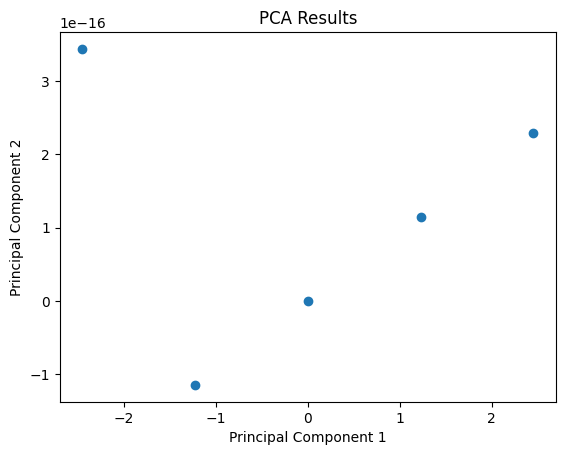

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ایجاد داده‌های نمونه
data = {'Feature1': [2, 4, 6, 8, 10],
        'Feature2': [1, 3, 5, 7, 9],
        'Feature3': [9, 7, 5, 3, 1]}
df = pd.DataFrame(data)

# استانداردسازی داده‌ها
scaler = StandardScaler()
data_std = scaler.fit_transform(df)

# اعمال PCA
pca = PCA(n_components=2)  # انتخاب تعداد مؤلفه‌های اصلی
principal_components = pca.fit_transform(data_std)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# نمایش نتایج
print(pca_df)

# نمودار نتایج PCA
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.show()


In [ ]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# ایجاد داده‌های نمونه
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 2, 3, 4, 5])

# ایجاد مدل
model = LinearRegression()

# تعریف LOOCV
loo = LeaveOneOut()

# متغیر برای ذخیره خطاها
errors = []

# اعمال LOOCV
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # آموزش مدل
    model.fit(X_train, y_train)

    # پیش‌بینی
    y_pred = model.predict(X_test)

    # محاسبه خطا
    error = mean_squared_error(y_test, y_pred)
    errors.append(error)

# محاسبه خطای کلی
mean_error = np.mean(errors)
print("Mean Squared Error:", mean_error)


Mean Squared Error: 3.944304526105059e-32


In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# بارگذاری مجموعه داده iris
data = load_iris()
X = data.data
y = data.target

# تقسیم داده‌ها به مجموعه‌های آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ایجاد مدل رگرسیون لجستیک با استراتژی one-versus-all
model = LogisticRegression(multi_class='ovr')  # 'ovr' = one-versus-rest
model.fit(X_train, y_train)

# پیش‌بینی بر روی مجموعه آزمون
y_pred = model.predict(X_test)

# ارزیابی مدل
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9555555555555556


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
